![Tec](http://www.cem.itesm.mx/di/seguridad/logotec.png)

<center><H1>M10 - El Reto de Aplicación</H1></center>

<center><H2>"Casos de éxito en la industria Medica"</H2></center>

El reto consiste en desarrollar un algoritmo con el que podamos predecir si el nuevo tratamiento medico funcionará en un grupo de  400 pacientes. Para lograr este objetivo, debes de usar un conjunto de datos de otros pacientes para poder analizar las variables necesarias y construir el modelo de machine learning que nos ayudará a validar el tratamiento. 


**Instrucciones:**
- Se usará el lenguaje de programación Python.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy, Scikit-learn.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar Notebooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Clasificador*" para analizar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción.


<center> <H1> <span style="color:blue;font-weight:bold">¡Comencemos! </span> </H1> </center>

**Nota:** Usa un conjunto de entrenamiento y otro de test para evaluar cada uno de los modelos propuestos, y realiza una serie de predicciones.

# **La metodología que se seguirá para la evaluación del modelo es la que se muestra en la siguiente imagen**

<center> <img src="./METODOLOGIA.jpg" width="800"> </center>

## **Importa las librerías necesarias**

Vamos ahora a descargar las herramientas necesarías para trabajar. 

**Nota:** Recuerda que para ejecutar cada celda (caja) tienes que usar **Shift+Enter**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

 # **1. Cargar Datos**

Para cargar los datos, debes subirlos desde los archivos que se te proporcionarón en el **CANVAS.** Una vez guardados, los almacenaremos en un dataframe llamado **data** 

In [2]:
data = pd.read_csv('data_ods_reto.csv')

 # **2. Preparar Datos**

### 2.1 Muestra los primeros valores del archivo para hacernos una idea del contenido de la tabla con el código: data.head()

In [3]:
data.head()

,a2,tc1,ma1,bw2,h1,x1,c23,psr,c33,bb,c12,output
0,0.76100,74.200,0.92865,0.45967,0.106870,0.96339,105.25,0.093125,28.0290,0.30518,36.75,0
1,0.39943,21.600,0.33333,0.30792,0.063125,0.56363,60.50,0.066250,5.8780,5.79830,20.50,1
2,0.25828,24.533,0.43239,0.28093,0.032500,0.31214,82.75,0.026875,10.0380,4.15040,20.50,1
3,0.33410,16.000,0.28101,0.17548,0.054375,0.53171,76.50,0.056875,10.5820,6.40870,27.25,1
4,0.42879,42.067,0.46357,0.16029,0.083125,0.53526,73.75,0.088750,9.4274,1.28170,24.00,1


### 2.1 Variable de salida

La variable que utilizaremos para clasificar los datos será **output**. Donde:
- **1** nos indica que el tratamiento **funcionó correctamente** para ese paciente, por lo tanto está sana.
- **0** nos indica que el tratamiento **no funcionó**  para ese paciente, con cual el paciente sigue con la enfermedad.

### 2.2 Variables de entrada

Como has podido observar en el apartado anterior, para predecir el funcionamiento de este nuevo tratamiento tenemos un total de **11 variables** asociadas a cada paciente. En total, contamos con una muestra de **2200 pacientes.** 

Dado que esta muestra corresponde a datos médicos personales, tanto la información de cada paciente como la **definición de cada una de variables** se han anonimizado. Por tanto, para desarrollar el algoritmo de predicción no contarás con esta información. Cualquier tratamiento de las variables (feature engineering) es válido con el solo propósito de mejorar la predicción del algoritmo. 

 # **3. Explorar Datos**

Para entender la distribución de los datos, vamos a observar **(Analizar dataset)**:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...



**a)** Utiliza la función .describe() para analizar la distribución de los datos

In [4]:
data.describe()

,a2,tc1,ma1,bw2,h1,x1,c23,psr,c33,bb,c12,output
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.329970,33.592457,0.439011,0.267576,0.076527,0.570247,79.861591,0.068725,15.000650,4.482670,28.654432,0.810455
std,0.156533,19.505999,0.195129,0.174021,0.022987,0.186590,14.380491,0.020183,10.675609,2.655921,11.396071,0.392030
min,0.063225,2.533300,0.085306,0.005039,0.015625,0.033422,43.000000,0.015000,2.287000,0.305180,8.750000,0.000000
25%,0.228870,18.516500,0.283828,0.108948,0.059375,0.453707,69.187500,0.054375,6.817025,2.197300,20.000000,1.000000
50%,0.315775,31.866500,0.416840,0.255900,0.075000,0.544515,78.250000,0.067500,11.529000,4.211400,26.000000,1.000000
75%,0.390945,47.083500,0.566972,0.391632,0.094375,0.682900,90.750000,0.086250,21.396750,6.408700,35.750000,1.000000
max,1.004800,82.400000,1.097700,0.937940,0.119370,0.995700,125.250000,0.105620,87.150000,12.512000,94.500000,1.000000


Escribe acá toda la información relevante que detectes de la tabla anterior:

<H1> <span style="color:Red;font-weight:bold">Comentarios:</span> </H1>

**b)** Calcula el número de personas sanas (**output=1**) y enfermas (**output=0**) que tenemos en la muestra (dataset):

In [5]:
data['output'].value_counts()

1    1783
0     417
Name: output, dtype: int64

### 3.1 Analizar las relaciones de las variables del *dataset*

Uno de los primeros pasos que debe hacer un Data Scientist es analizar si existen o no relaciones entre las variables y la salida.

-  ¿Que método usarías para analizar esta relación?
-  ¿Cuál de estas variables de entrada está relacionada con la variable de salida **output**, y cuál no?

<H1> <span style="color:Red;font-weight:bold">Comentarios:</span> </H1>

**c)** Crea una matriz de correlación para analizar esta relación entre las variables.

**Ayuda:** puedes usar los siguientes métodos:
- .corr() 
- .style.background_gradient(cmap='coolwarm')



<AxesSubplot:>

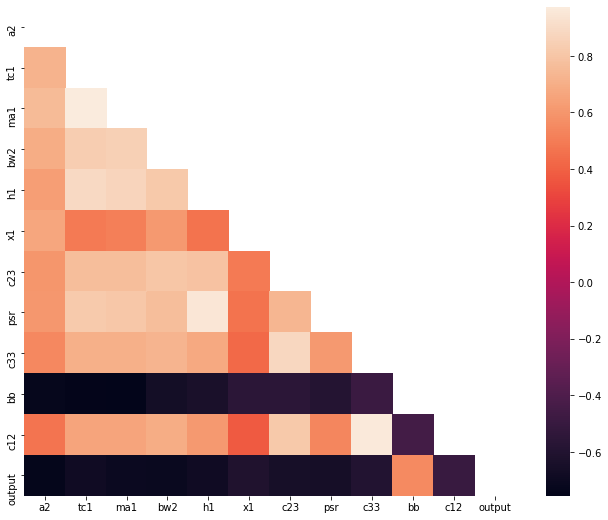

In [6]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask)

Cuanto más cercano es el valor a 1 o -1, más correlación (lineal) existe. 

- **d)** ¿Cuáles son las variables (features) que más se relacionan con la salida (**output**)?

Escribe acá toda la información que consideres relevante de la tabla anterior:



<H1> <span style="color:Red;font-weight:bold">Comentarios:</span> </H1>

### 3.2 Análisis descriptivo

Representaremos visualmente los datos de manera que:
- Cada punto simbolice una persona.
- Un punto naranja representa un paciente que **no le funcionó** el tratamiento. Por otro lado, un punto azul representa un paciente donde el **tratamiento si funcionó**.
- Los **ejes x** e **y** representan dos variables que queremos **comparar**.

#### Función auxiliar para representar gráficas de valores del dataset

In [7]:
# FUNCION AUXILIAR; NO MODIFICAR, SOLO EJECUTAR

def plot_feat1_feat2(feat1,feat2):
    D = data[(data['output'] != 0)]
    H = data[(data['output'] == 0)]    

    plt.scatter(D[feat1], D[feat2], label='healthy', alpha = 0.20)
    plt.scatter(H[feat1], H[feat2], label='sick', alpha = 0.20)

    plt.title(feat1 +" "+"vs"+" "+feat2)
    plt.xlabel(feat1)
    plt.ylabel(feat2)

    plt.legend() 

    plt.show()

Intenta explicar que ocurre en la función auxiliar aquí:

<H1> <span style="color:Red;font-weight:bold">Comentarios:</span> </H1>

Divide el conjunto de datos en Healthy & Sick en función de 2 variables

Ejemplo para representar información de "2 columnas" vs "la que nos interesa predecir"

In [8]:
# La representación puede lograrse con el siguiente código:
#plot_feat1_feat2('NombreColumna1','NombreColumna2')

**e)** Representa gráficamente la relación entre 'h1' y 'psr'


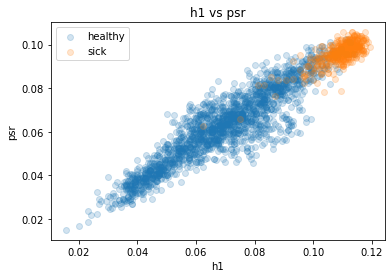

In [9]:
plot_feat1_feat2('h1','psr')

**f)** Representa gráficamente la relación entre 'c33' y 'c12'


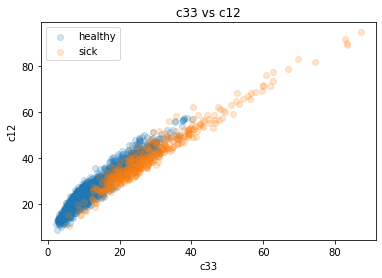

In [10]:
plot_feat1_feat2('c33','c12')

**g)** Representa gráficamente la relación entre otras variables que consideres hayan tenido una buena correlación en la pregunta **c)**

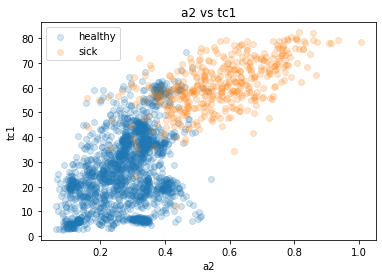

In [11]:
plot_feat1_feat2('a2','tc1')

 # **4. Definir Modelo**

El clasificador es un algoritmo que nos va a permitir analizar un conjunto de datos y clasificarlos en grupos. 

En Machine Learning se utiliza un clasificador para el análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).

![Clasificación](https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png)


**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.

**Objetivo**
- En este reto, queremos lograr predecir o **clasificar** a que grupo de personas le funcionará el tratamiento, es decir queremos separar las personas sanas  (output=1) de las personas a las que no le ha funcionado el tratamiento y por lo tanto se consideran aún enfermas (output=0). Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"

![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un clasificador mediante un [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *RandomForest, XgBoost, KNN*

- Entrenar el clasificador con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
- Predecir resultados mediante nuestro set de datos de test o mediante nuevos datos.
- Determinar las conclusiones de los resultados obtenidos en las predicciones, como el % de acierto y precisión obtenida.




In [21]:
X = data.drop('output',axis=1)
y = data['output']

**4.1)** Crea un conjunto de datos de entrenamiento y un conjunto de datos de test.

Intrucciones: 

- **seed:** esta variable será igual la suma de los años de nacimiento de los participantes. 
  Ejemplo: seed = 1992 + 2000+ 1995 + 1990 = 7977

- **test_size:** no se permite usar más del 20% de datos para crear el test

In [13]:
seed = (1980 + 1981 + 1996) * 5  #suma los cumpleños de los participantes por el número del equipo
test_size = 0.20  #máximo 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = test_size, random_state = seed)

**4.2)** Crea el clasificador y entrénalo

In [14]:
# Crear clasificador Regresión Logística
# Una línea de código
model =  LogisticRegression(solver = 'liblinear')

In [15]:
# Entrenar el clasificador con las los datos de entrenamiento y las feature
# Una línea de código
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

 # **5. Visualización del Modelo**

In [16]:
# Obtén resultados
r_sq = model.score(X_train,y_train)
print('coeficiente de determinación:', r_sq)

coeficiente de determinación: 0.9704545454545455


 # **6. Predecir Datos**

Usa el modelo que acabas de entrenar en el conjunto de **X_test** para calcular el acierto del modelo:

In [17]:
# Aplicar classif.predict sobre los datos X de test (X_test)
# Una línea de código
y_pred = model.predict(X_test)
print('respuesta prevista:', y_pred, sep='\n')


respuesta prevista:
[1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1]


<center> <H1> <span style="color:blue;font-weight:bold">¡Enhorabuena!</span> </H1> </center>

Ya has entrenado tu primer algoritmo de Machine Learning.  Ahora a comparar los resultados de tu modelo con los valores reales usando algunas de las métricas más comunes.  

 # **7. Evaluar Resultados**

###  Matriz de Confusión

La Matriz de Confusión es una métrica que nos va a permitir conocer el rendimiento y acierto de una clasificación realizada con Machine Learning.
Podemos encontrar información adicional para entender su objectivo en el siguiente enlace: [ConfusionMatrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
 
![texto alternativo](https://miro.medium.com/max/578/1*7EYylA6XlXSGBCF77j_rOA.png) 

**7.1)** Crearemos una matriz de confusión para analizar las predicciones anteriores obtenidas de nuestro clasificador.

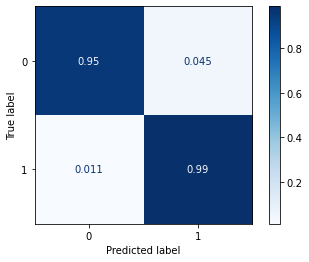

In [18]:
disp = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues,normalize = 'true')

¿Qué porcentaje de casos se situa en cada cuadrante? ¿En medicina, es peor un false positive o un false negative? Comenta aquí la matriz y responde a las preguntas:

<H1> <span style="color:Red;font-weight:bold">Comentarios:</span> </H1>

In [19]:
#----------------------------------------------------------------
# Para mostrar el resultado de la predicción del clasificador
# utiliza la siguiente función auxiliar (NO MODIFICAR)

def print_mse_f1(Y_Real, Y_Pred): 
    rmse = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    print('El Mean Squared Error (MSE) del modelo entrenado es:', rmse)
    print('El F1 score del modelo entrenado es:', f1)


**5.2)** Utiliza la función **print_mse_f1** con la predicción obtenida a partir del modelo entrenado para medir el error:

In [20]:
print_mse_f1(y_train,y_pred)

El Mean Squared Error (MSE) del modelo entrenado es: 0.01818181818181818
El F1 score del modelo entrenado es: 0.9818181818181818


Si deseas entender más sobre las métricas aplicadas a algoritmos de clasificación, consulta el siguiente enlace: [métricas](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)


# 8. Mejorar predicción

¿Crees que puedes mejorar la predicción?

Puedes intentar:

- Optimizar los parámetros del clasificador
- Prueba entrenar otro tipo de modelo de [clasificación](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *RandomForest, XgBoost, KNN*

<H1> <span style="color:Red;font-weight:bold">Conclusiones:</span> </H1>